In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv("/content/drive/My Drive/DataSets/ds_challenge1/Given_data/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/DataSets/ds_challenge1/Given_data/test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [4]:
df_train.dropna(axis = 0, inplace = True)

In [5]:
# conversion of non numeric features into numeric

# creating label encoder object
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_train['data3']= label_encoder.fit_transform(df_train['data3']) 
df_train['data9']= label_encoder.fit_transform(df_train['data9'])
df_train['data10']= label_encoder.fit_transform(df_train['data10']) 
   
df_test['data3']= label_encoder.fit_transform(df_test['data3']) 
df_test['data9']= label_encoder.fit_transform(df_test['data9'])
df_test['data10']= label_encoder.fit_transform(df_test['data10']) 

In [6]:
df_train.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,0,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1,0,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,0,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,0,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,1,0,64.925051


In [7]:
df_train.isnull().sum() #Checking for total null values

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
output    0
dtype: int64

In [8]:
np.any(np.isnan(df_train)) #Checking for null values, If True is op then there are null or else Flase

False

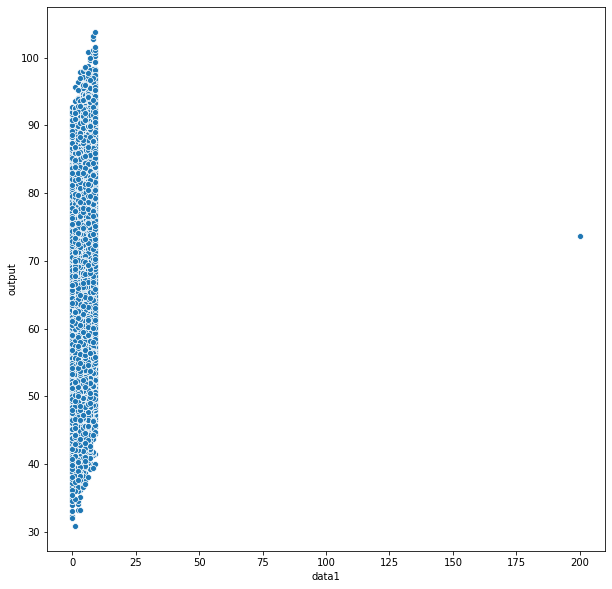

In [9]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_train['data1'], y = df_train['output'])

In [10]:
#1 Outlier FOUND, removing it using For loop.
i = df_train.loc[df_train['data1'] > 100].index
print(i)
df_train.drop(i, inplace = True)

Int64Index([18], dtype='int64')


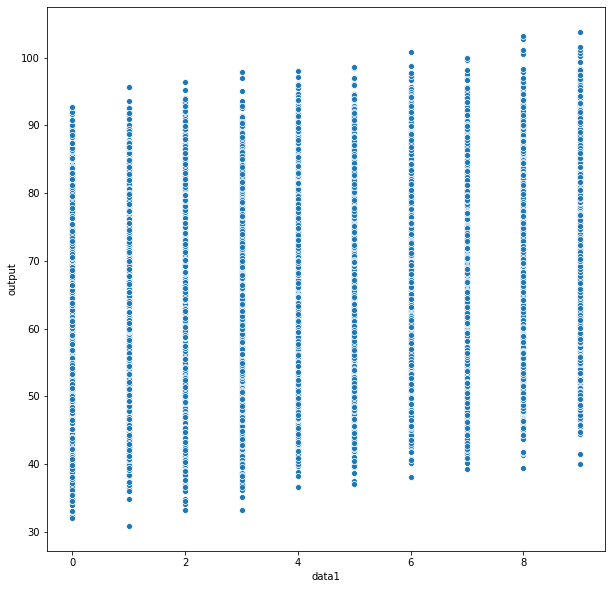

In [11]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_train['data1'], y = df_train['output'])

In [12]:
  from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

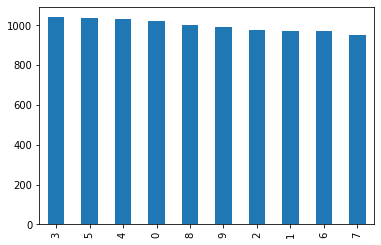

In [13]:
_ = df_train['data1'].value_counts().plot(kind='bar')
plt.show()

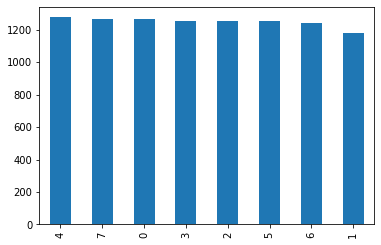

In [14]:
_ = df_train['data3'].value_counts().plot(kind='bar')
plt.show()

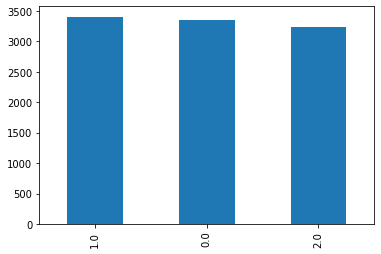

In [15]:
_ = df_train['data8'].value_counts().plot(kind='bar')
plt.show()

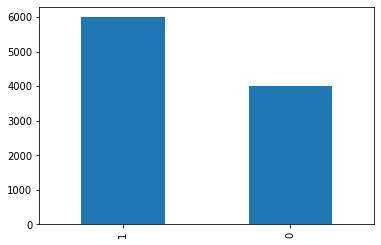

In [16]:
_ = df_train['data9'].value_counts().plot(kind='bar')
plt.show()

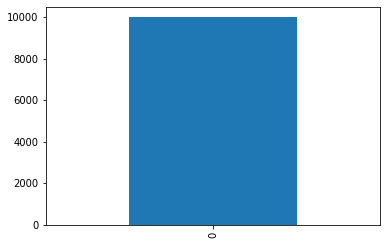

In [17]:
_ = df_train['data10'].value_counts().plot(kind='bar')
plt.show()

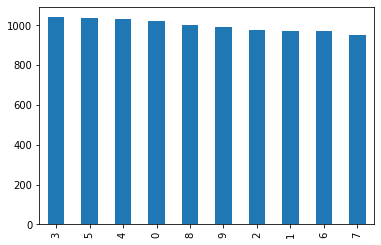

In [18]:
_ = df_train['data1'].value_counts().plot(kind='bar')
plt.show()

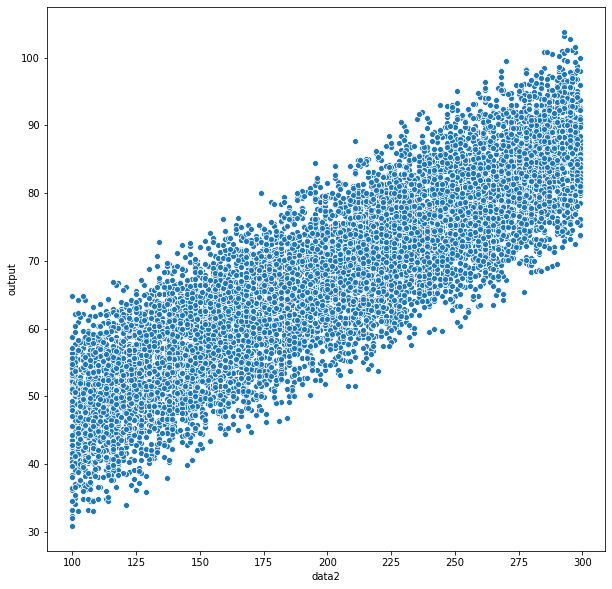

In [19]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_train['data2'], y = df_train['output'])

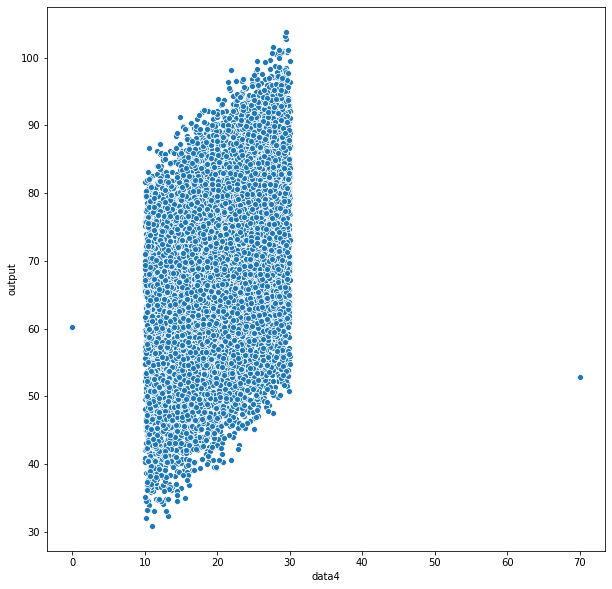

In [20]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_train['data4'], y = df_train['output'])

In [21]:
i = df_train.loc[df_train['data4'] > 50].index
print(i)
df_train.drop(i, inplace = True)

i = df_train.loc[df_train['data4'] < 10].index
print(i)
df_train.drop(i, inplace = True)

Int64Index([33], dtype='int64')
Int64Index([81], dtype='int64')


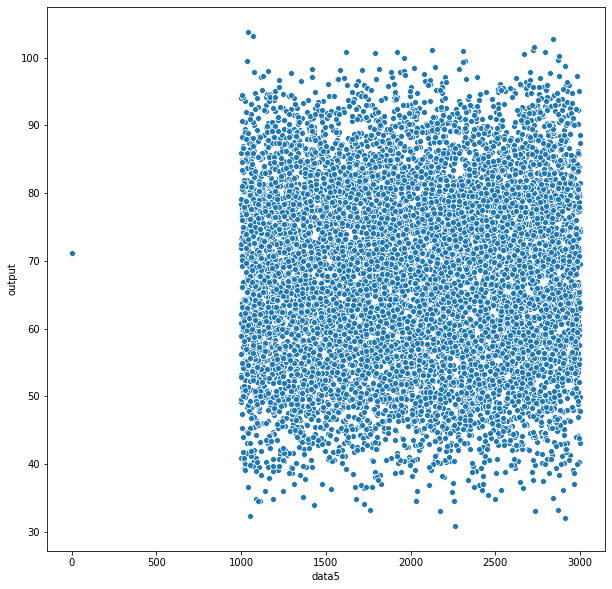

In [22]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_train['data5'], y = df_train['output'])

In [23]:
i = df_train.loc[df_train['data5'] < 500].index
print(i)
df_train.drop(i, inplace = True)

Int64Index([46], dtype='int64')


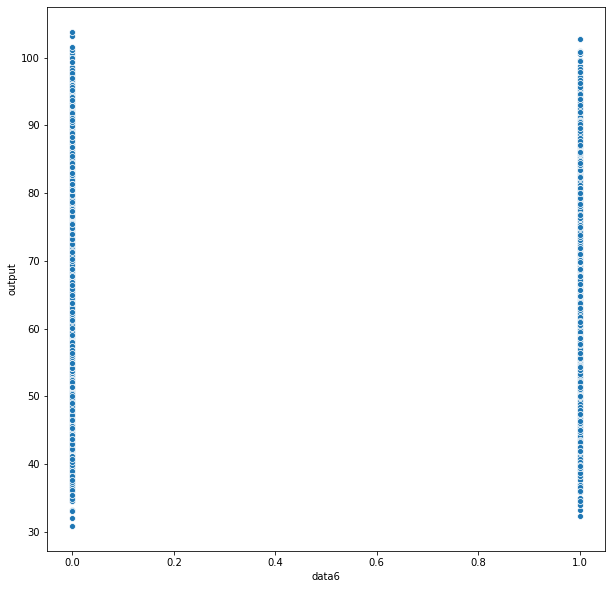

In [24]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_train['data6'], y = df_train['output'])

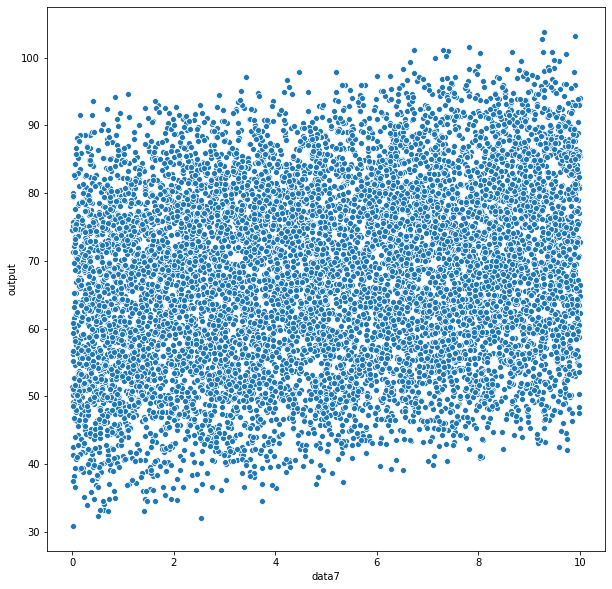

In [25]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_train['data7'], y = df_train['output'])

In [26]:
del df_train["data10"]
del df_test["data10"]

In [27]:
df_train


,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,1,64.925051
...,...,...,...,...,...,...,...,...,...,...
9995,9,263,0,16.604215,1070.0,0.0,8.979149,2.0,0,85.922943
9996,5,280,4,28.758911,2652.0,0.0,3.574129,0.0,0,90.857149
9997,6,188,3,15.963267,1359.0,0.0,2.880019,0.0,0,61.246960
9998,1,132,7,11.683401,1793.0,0.0,6.983192,2.0,0,45.298253


In [28]:
X = df_train.drop(['output'], axis = 1, inplace = False)
y = df_train['output']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7494, 9) (2499, 9) (7494,) (2499,)


In [30]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = regressor.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
1643,78.109018,78.109018
1348,47.901732,47.901732
3425,76.584313,76.584313
1352,70.346561,70.346561
8078,81.167425,81.167425
...,...,...
6890,84.012346,84.012346
4290,87.815740,87.815740
6079,56.005503,56.005503
1496,71.101392,71.101392


In [32]:
r2_score(y_test, y_pred)

1.0

In [33]:
df_test

,data1,data2,data3,data4,data5,data6,data7,data8,data9
0,7,195,0,29.038043,2725,1,6.145731,2,1
1,9,109,5,20.221431,1184,1,9.334184,2,1
2,0,126,2,26.477532,2975,1,9.021806,1,1
3,2,209,4,13.445450,1067,1,1.814993,0,1
4,5,268,1,25.065894,1336,1,1.639130,1,1
...,...,...,...,...,...,...,...,...,...
9995,7,251,3,23.004384,1637,0,8.333728,1,0
9996,5,275,0,29.514058,2339,0,9.953107,1,0
9997,8,168,2,22.520965,1827,0,7.555553,1,0
9998,4,296,4,16.558948,1748,0,8.846995,1,0


In [34]:
df_test.dropna(axis = 0, inplace = True)

In [35]:
df_test.isnull().sum()

data1    0
data2    0
data3    0
data4    0
data5    0
data6    0
data7    0
data8    0
data9    0
dtype: int64

In [36]:
np.any(np.isnan(df_test))

False

In [37]:
output_Values = regressor.predict(df_test)

In [38]:
df_inference = pd.DataFrame({'output': output_Values})
df_inference

,output
0,78.279970
1,58.333472
2,58.051585
3,57.715898
4,82.798435
...,...
9995,86.637674
9996,96.915760
9997,69.824421
9998,87.350048


In [39]:
df_inference.set_index('output',inplace = True)
df_inference

""
output
78.279970
58.333472
58.051585
57.715898
82.798435
...
86.637674
96.915760
69.824421


In [40]:
df_inference.to_csv('file.csv')